In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier

In [2]:
transaction_train = pd.read_csv('./ieee-fraud-detection/train_transaction.csv',  index_col='TransactionID')
identity_train = pd.read_csv('./ieee-fraud-detection/train_identity.csv', index_col='TransactionID')
#transaction_test = pd.read_csv('./ieee-fraud-detection/test_transaction.csv', index_col='TransactionID')
#identity_test = pd.read_csv('./ieee-fraud-detection/test_identity.csv', index_col='TransactionID')
print('done')

done


In [3]:
#picking fields used for training
#chosen_fields = ['D1','D2','D3','D4','D5','D6','M1','M9','V12','V13','id_20','card2','D15','TransactionAmt','M5','D6']

chosen_fields = ['TransactionAmt','addr1','addr2','card2','card3','card4','card5','card6',
                 'D1','D2','D3','D4','D5','D6','D9','D10','D11','D12','D13','D14','D15','dist1','dist2',
                 'id_01','id_02','id_05','id_12','id_13','id_14','id_18','id_19','id_20','id_30','id_33',
                 'M7','M9','P_emaildomain','R_emaildomain',
                 'M3','M4','M5','M6','M8',
                 'V12','V13','V19','V20','V38','V45','V53','V54','V55','V61','V75','V76','V82',
                 'V283','V284','V291','V304','V305','V306','V307','V308','V310','V312','V313','V315', 
                 'C1','C2','C5','C6','C8','C9','C10','C11','C12','C14',]

#parameters for models will go here


In [4]:
#merging Data
train =  pd.merge(transaction_train,identity_train, how= 'left', left_index=True, right_index=True)
#test =  pd.merge(transaction_test,identity_test, how= 'left', left_index=True, right_index=True)

print('merged')

merged


In [5]:
#dropping target
y_train = train['isFraud'].copy()
X_train = train.drop('isFraud', axis = 1)
#X_test = test.copy()



In [6]:
#fill na's
X_train = X_train.fillna(0)
#X_test = X_test.fillna(0)

In [7]:
#label encoding
for f in X_train.columns:
    if X_train[f].dtype == 'object':
        #or X_test[f].dtype=='object':
        le = preprocessing.LabelEncoder()
        le.fit(list(X_train[f].values)+ list(X_train[f].values))
        X_train[f]=le.transform(list(X_train[f].values))
        #X_test[f]= le.transform(list(X_test[f].values))
        
print('done')

done


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)

In [9]:
X_train = X_train[chosen_fields]
X_test=X_test[chosen_fields]

k: 1, Train/Test Score: 1.000/0.949
k: 3, Train/Test Score: 0.974/0.963
k: 5, Train/Test Score: 0.970/0.964
k: 7, Train/Test Score: 0.968/0.965
k: 9, Train/Test Score: 0.968/0.965


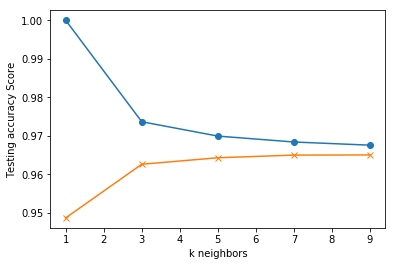

In [10]:
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)))

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)


In [ ]:
sgd_clf.predict(["IsFraud"])


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splist=3, random_stat=42)

from train_index, test index in skfolds.split(X_train, y_train)
    clone_clf = clone(sgd_clf)
    x_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold= X_train[test_index]
    y_test_fold = Y_train [test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = cum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))
    

In [ ]:
#X_train = X_train[chosen_fields]
#X_test=X_test[chosen_fields]

In [ ]:
print (X_train.shape)

In [ ]:
def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_train, y, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.10770897837749183
Testing Score: 0.10796889020253285
